In [1]:
#loading Dataset
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#EDA
from collections import Counter

#data preprocessing
from sklearn.preprocessing import StandardScaler
#data Splitting
from sklearn.model_selection import train_test_split

#data modelling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#CombineallEnsembling
from mlxtend.classifier import StackingCVClassifier

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
y = data["target"]
x = data.drop('target', axis=1)

# First split: Split data into main set and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Second split: Split main set into training set and validation set
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_main, Y_main, test_size=0.2, stratify=Y_main, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print(Y_test.unique())
Counter(Y_train) #imported

[1 0]


Counter({1: 419, 0: 401})

In [10]:
#Logistic Regression Model
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)
print("Confusion Matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression on Test Set", lr_acc_score*100, '\n')
print("Classification Report (Test Set):")
print(classification_report(Y_test, lr_predict))


Confusion Matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression on Test Set 86.34146341463415 

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [11]:
#Random Forest Model
m2 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5)
rf.fit(X_train, Y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_predicted)
rf_acc_score = accuracy_score(Y_test, rf_predicted)
print("Confusion Matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest", rf_acc_score*100, '\n')
print(classification_report(Y_test, rf_predicted))

Confusion Matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [12]:
#Random Forest Model
m3 = 'Decision Tree'
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=6)
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)
print("Confusion Matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree", dt_acc_score*100, '\n')
print(classification_report(Y_test, dt_predicted))

Confusion Matrix
[[95  3]
 [ 8 99]]


Accuracy of Decision Tree 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [13]:
m4 = 'Support Vector Classifier'
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, Y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(Y_test, svc_predicted)
svc_acc_score = accuracy_score(Y_test, svc_predicted)
print("Confusion Matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier ", svc_acc_score*100, '\n')
print(classification_report(Y_test, svc_predicted))

Confusion Matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier  98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



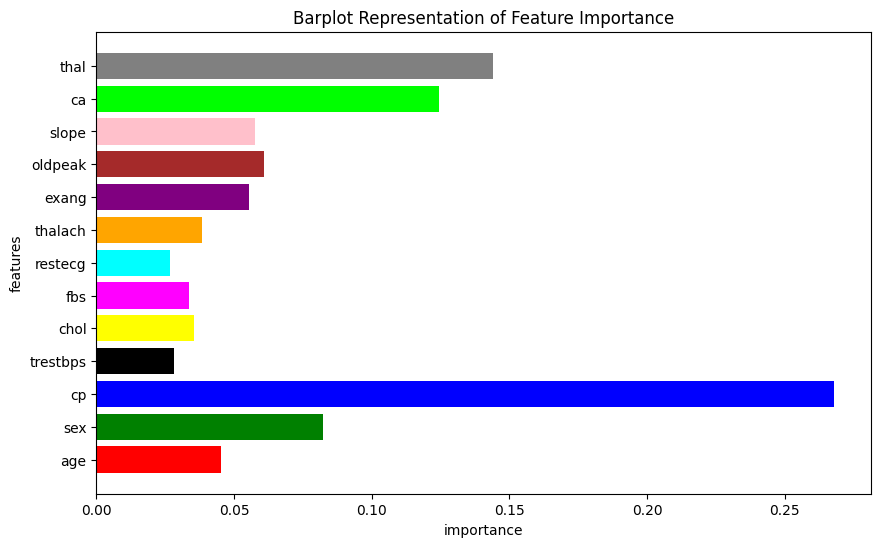

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)


colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'lime', 'grey']

imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                                        'exang', 'oldpeak', 'slope', 'ca', 'thal'], 
                            'Importance': xgb.feature_importances_})
plt.figure(figsize=(10, 6))
plt.title("Barplot Representation of Feature Importance")
plt.xlabel("importance")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

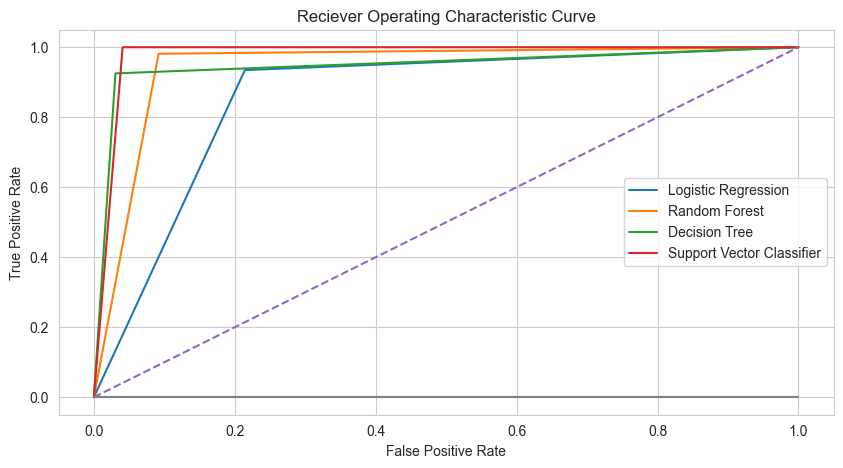

In [15]:
#graph shows accuracy wise plot

lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(Y_test, lr_predict)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(Y_test, rf_predicted)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(Y_test, dt_predicted)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(Y_test, svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characteristic Curve')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')

plt.plot([0,1], ls='--')
plt.plot([0,0], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [16]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support vector Classifiers'], 
                            'Accuracy':[lr_acc_score*100, rf_acc_score*100, dt_acc_score*100, svc_acc_score*100]})

model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Random Forest,94.634146
2,Decision Tree,94.634146
3,Support vector Classifiers,98.048780


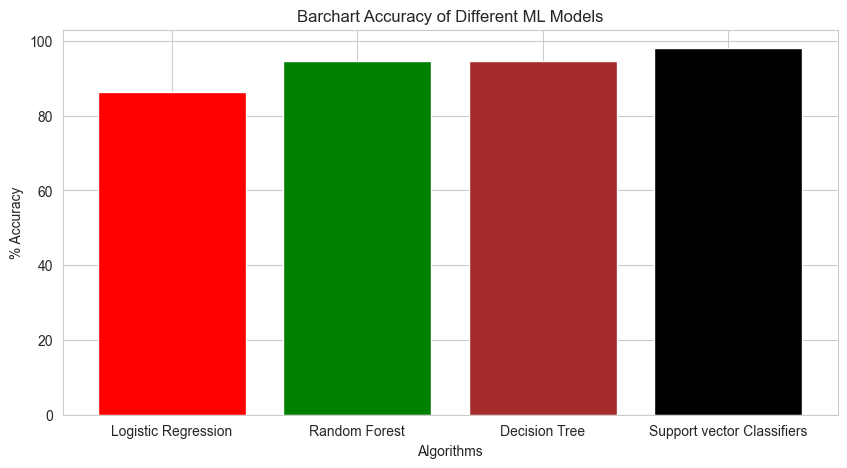

In [17]:
colors = ['red', 'green', 'brown', 'black', 'orange']
plt.figure(figsize=(10,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)
plt.show()

In [18]:
#SVC has most Accuracy Amongst three

In [19]:
Y_test

807    1
27     0
77     0
406    1
886    0
      ..
877    1
320    1
362    1
452    0
500    1
Name: target, Length: 205, dtype: int64

In [20]:
svc_predicted

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [21]:
Category=['No You Dont Have Heart Disease', 'Yes, You Have a Heart Disease..please Get All Tests Done']

In [22]:
custom_data_input = np.array([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

In [23]:
std_data = scaler.transform(custom_data_input)
std_data

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.29347783,  0.64895597, -0.91984324, -0.37683811, -0.6740592 ,
        -0.42209113,  0.92106058,  0.82351894, -0.7200823 , -0.03392063,
         0.97028605,  1.17427458,  1.10177143]])

In [24]:
max_acc = np.max([lr_acc_score*100, rf_acc_score*100, dt_acc_score*100, svc_acc_score*100])

In [25]:

if(int(lr_acc_score*100) == int(max_acc)):
    custom_data_pred = lr.predict(std_data)
elif(int(dt_acc_score*100) == int(max_acc)):
     custom_data_pred = dt.predict(std_data)
elif(int(rf_acc_score*100) == int(max_acc)):
     custom_data_pred = rf.predict(std_data)
else:
    custom_data_pred = svc.predict(std_data)

In [26]:
custom_data_pred

array([0])

In [27]:

print(Category[int(custom_data_pred)])

No You Dont Have Heart Disease


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_8240\2170468813.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(Category[int(custom_data_pred)])


In [ ]:
import pickle

filename = 'heart_disease_trained_model.sav'
pickle.dump(svc, open(filename, 'wb'))

#loading Saved Model
loaded_model = pickle.load(open('heart_disease_trained_model.sav', 'rb'))

